In [27]:
from moveminer.anomalies_detection.AnomalousTrajectories import DetectOutlierTrajectory
from moveminer.anomalies_detection.AnomalousEvents import AnomalousEvents
from sklearn.neighbors import LocalOutlierFactor
from moveminer import Trajectory
from moveminer import constants
import pandas as pd
import moveminer
import warnings

warnings.filterwarnings("ignore")

### Anomaly Detection

In [28]:
raw_data = pd.read_csv("./test.csv")

In [29]:
traj = Trajectory(df=raw_data, x="x", y="y", t="datetime", uid="id")

In [30]:
# partition trajectories
db_scan = moveminer.clustering.DBSCAN(cluster_radius_km=0.018)
db_traj = db_scan.db_scan(traj)

<Axes: >

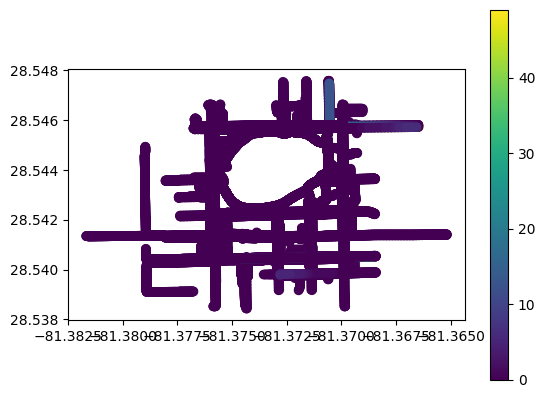

In [31]:
db_traj.gdf.plot(column=constants.CLUSTER, legend=True)

In [32]:
anomalous_events = AnomalousEvents()
outlier_traj = anomalous_events.anomalous_events(db_traj, outlier_threshold=0.5)
outlier_traj.gdf[constants.OUTLIER_SCORE].value_counts()

outlier_score
0.971121    75694
1.000000      312
0.773585      159
0.728571      140
0.838235      136
0.875000      128
0.412698      126
0.697479      119
0.769912      113
0.927928      111
0.763158       76
0.636364       44
0.631579       38
0.263158       38
0.562500       32
0.000000        1
Name: count, dtype: int64

<Axes: >

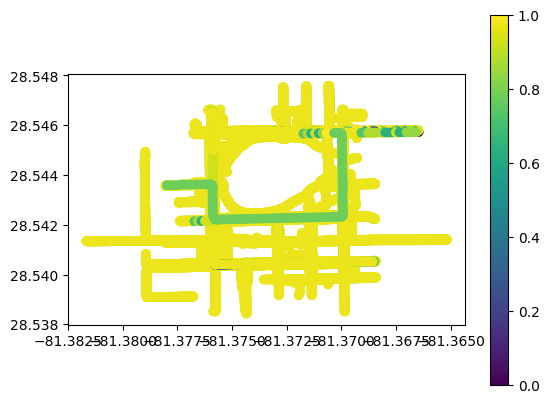

In [33]:
outlier_traj.gdf.plot(column=constants.OUTLIER_SCORE, legend=True)

In [34]:
DOT = DetectOutlierTrajectory()
outlier_traj = DOT.detect_outlier_trajectory(outlier_traj, 0.7)

<Axes: >

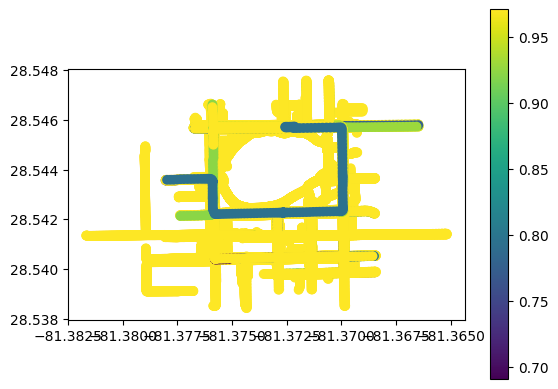

In [35]:
outlier_traj.gdf.plot(column=constants.TRAJ_OUTLIER_SCORE, legend=True)